# Statistics of the ABSA Airline Dataset

Extraction of statistics about the complete annotated dataset.

At the end of the notebook the data splitting for the training/testing steps is also performed, and the distribution of the training examples is checked.

*note: the output of some of the cells is hidden because it shows private data.*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import numpy as np

# read in the complete annotated dataset
new_df = pd.read_csv("path/to/absa_dataset.csv", delimiter=';', header= 0, dtype= str, keep_default_na=False, encoding= 'utf-8')

In [ ]:
new_df

In [3]:
new_df.groupby('Sentiment').size() # frequency of sentiment labels

Sentiment
Mix           64
Negative     855
Neutral     1176
Positive     400
dtype: int64

In [4]:
new_df.groupby('Aspect_Category').size() # frequency of category labels

Aspect_Category
Aircraft equipment    203
Boarding               85
Company               148
Food                  150
Information           105
Luggage               101
Multiple              121
NA                    923
Others                  6
Price                  47
Safety                 13
Service               220
Staff                 233
Travel                140
dtype: int64

In [5]:
new_df.describe()

,Sentence,Aspect_Category,Sentiment
count,2495,2495,2495
unique,2477,14,4
top,1.,NA,Neutral
freq,6,923,1176


In [6]:
# Average length of the sentences

lengths = []

for sentence in new_df["Sentence"]:
    lengths.append(len(word_tokenize(sentence)))
    
mean = sum(lengths)/len(lengths)
print("Mean length of sentence: ") 
print(round(mean, 2))

Mean length of sentence: 
17.56


In [7]:
tokens = []
for sentence in new_df['Sentence'].astype(str):
    [tokens.append(token) for token in word_tokenize(sentence)]

In [8]:
# tokens count
print(len(tokens))

43824


In [23]:
# print(*tokens)

In [10]:
from collections import Counter

n = 2                         # this number can be changed to see different types of ngrams
ngram_frequencies = Counter()
for sentence in new_df['Sentence'].astype(str):
    tokens_list = [tok.lower() for tok in word_tokenize(sentence)]
    ngrams = [" ".join(tokens_list[i:i+n]) for i in range(len(tokens_list)-n+1)]
    ngram_frequencies.update(ngrams)


print(ngram_frequencies.most_common(20))

[('i was', 135), ('on the', 135), ('of the', 135), ('in the', 126), ('the flight', 109), ('it was', 102), ('to the', 96), ('to be', 91), (', i', 85), ('for the', 85), ('and i', 79), ('! !', 76), ('i had', 75), ('i have', 74), ('did not', 74), ('at the', 70), (', but', 69), ('and the', 69), ('had to', 65), (', and', 62)]


In [ ]:
import string
# These are the stopwords 
stopwords = ["€šdon", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"] 
        
frequent_ngrams = ngram_frequencies.most_common(1700)
for tokens, freq in frequent_ngrams: 
    
    filter = False
    
    for token in tokens.split():
        # remove punctuation
        if token in string.punctuation: 
            filter = True
    
        # remove stopwords
        if token in stopwords: 
            filter = True
    
    if not filter: 
        print(tokens, freq)

Example of output without private information:


business class 45\
cabin crew 32\
connecting flight 28\
entertainment system 18\
customer service 16\
flight attendant 15\
economy comfort 13\
leg room 12

In [12]:
# Number of sentences that actually contain aspects 
count = 0
for asp in new_df['Aspect_Category'].astype(str):
    if asp != 'NA' and asp != 'Multiple' and asp != 'Other':
        count +=1
print(count)

1451


## Plot

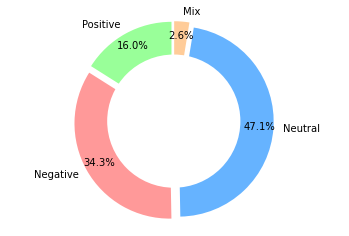

In [11]:
# Pie chart
labels = 'Positive', 'Negative', 'Neutral', 'Mix'
sizes = [400, 855, 1176, 64]

#explsion
explode = (0.05,0.05,0.05,0.05)  # separation between slices

#colors
colors = ['#99ff99','#ff9999','#66b3ff','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

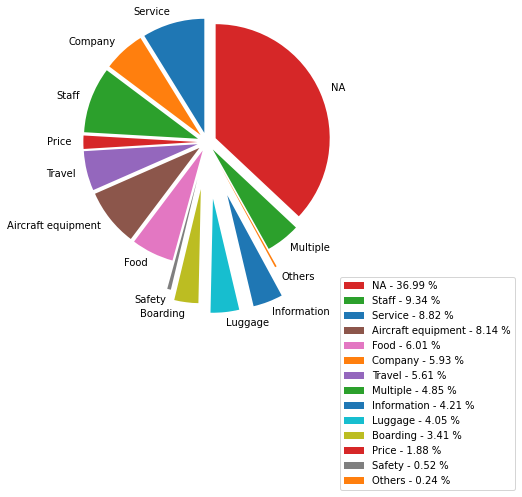

In [13]:
# Pie chart

labels = ['Service', 'Company', 'Staff', 'Price', 'Travel', 
          'Aircraft equipment', 'Food', 'Safety', 'Boarding', 
          'Luggage','Information', 'Others', 'Multiple', 'NA']

x = np.char.array(labels)

y = np.array([220, 148, 233, 47, 140, 
          203, 150, 13, 85, 
          101, 105, 6, 121, 923])
               
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.5, 0.6, 0.6, 0.3, 0.1, 0.1)  # separation between slices

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, labels=labels,  startangle=90, explode=explode, radius=1.2)  #
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.legend(patches, labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.55)
plt.show()

## Data split
The dataset is splitted in training, validation, and test sets. 
* 80% training
* 10% validation
* 10% test

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
#split the data into train and test set
df_train = pd.read_csv("path/to/absa_dataset.csv", delimiter=';', header= 0, dtype= str, keep_default_na=False, encoding= 'utf-8')

train,test_temp = train_test_split(df_train, test_size=0.20, random_state=5)
test, validation = train_test_split(test_temp, test_size=0.50, random_state=0)

#save the data
train.to_csv('path/to/train.csv',index=False, sep= ';')
validation.to_csv('path/to/valid.csv',index=False, sep= ';')
test.to_csv('path/to/test.csv',index=False, sep= ';')

### We explore the stats of the training set to see the distribution of the training examples.

In [3]:
train_df = pd.read_csv("path/to/train.csv", delimiter=';', header= 0, dtype= str, keep_default_na=False, encoding= 'utf-8')


In [4]:
train_df.groupby('Sentiment').size()

Sentiment
Mix          43
Negative    657
Neutral     964
Positive    332
dtype: int64

In [5]:
train_df.groupby('Aspect_Category').size()

Aspect_Category
Aircraft equipment    153
Boarding               66
Company               113
Food                  122
Information            87
Luggage                78
Multiple               92
NA                    763
Others                  5
Price                  40
Safety                  9
Service               178
Staff                 181
Travel                109
dtype: int64

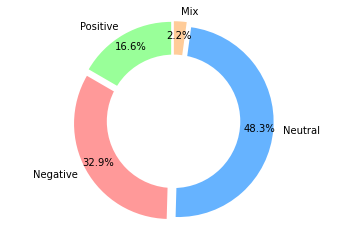

In [6]:
# Pie chart
labels = 'Positive', 'Negative', 'Neutral', 'Mix'
sizes = [332, 657, 964, 43]

#explosion
explode = (0.05,0.05,0.05,0.05)  # separation between slices

#colors
colors = ['#99ff99','#ff9999','#66b3ff','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

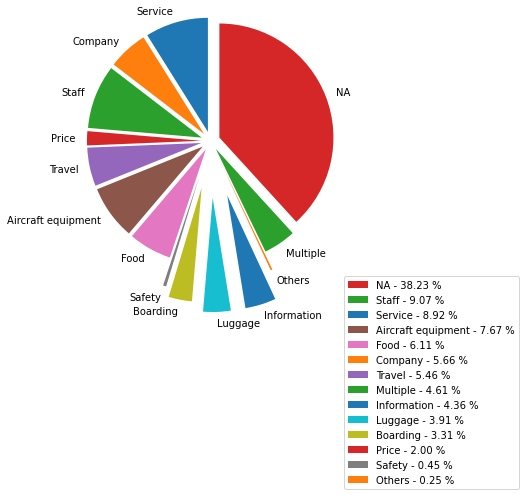

In [7]:
labels = ['Service', 'Company', 'Staff', 'Price', 'Travel', 
          'Aircraft equipment', 'Food', 'Safety', 'Boarding', 
          'Luggage','Information', 'Others', 'Multiple', 'NA']

x = np.char.array(labels)

y = np.array([178, 113, 181, 40, 109, 
          153, 122, 9, 66, 
          78, 87, 5, 92, 763])
               
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.5, 0.6, 0.6, 0.3, 0.1, 0.1)  # separation between slices

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, labels=labels,  startangle=90, explode=explode, radius=1.2)  #
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(6, 10)
plt.legend(patches, labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.55)
plt.show()

## End of the notebook.